#Assignment - Naive Bayes

**Prepare a classification model using Naive Bayes for salary data**

**Data Description:**

age -- age of a person

workclass-- A work class is a grouping of work

education-- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation-- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

# Import dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [4]:
SalaryData_Test =pd.read_csv('SalaryData_Test.csv')
SalaryData_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
from google.colab import files
uploaded =files.upload()

Saving SalaryData_Train.csv.crdownload to SalaryData_Train.csv.crdownload


In [6]:
SalaryData_Train = pd.read_csv('SalaryData_Train.csv.crdownload')
SalaryData_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,39,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
29885,30,Private,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
29886,62,Without-pay,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,16,United-States,<=50K
29887,27,Private,HS-grad,9,Never-married,Craft-repair,Other-relative,Other,Male,0,0,40,Nicaragua,<=50K


# Exploratory Data Analysis

In [7]:
SalaryData_Train.shape

(29889, 14)

In [9]:
SalaryData_Test.shape

(15060, 14)

In [10]:
SalaryData_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,29889.000000,29889.000000,29889.000000,29889.000000,29889.000000
mean,38.425742,10.123256,1093.753990,88.324802,40.923082
std,13.128419,2.547527,7413.155479,404.234354,11.977811
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
SalaryData_Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


#View top 5 rows of dataset

In [13]:
# preview the Training dataset

SalaryData_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# preview the Test dataset

SalaryData_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#View summary of Training dataset

In [15]:
SalaryData_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            29889 non-null  int64 
 1   workclass      29889 non-null  object
 2   education      29889 non-null  object
 3   educationno    29889 non-null  int64 
 4   maritalstatus  29889 non-null  object
 5   occupation     29889 non-null  object
 6   relationship   29889 non-null  object
 7   race           29889 non-null  object
 8   sex            29889 non-null  object
 9   capitalgain    29889 non-null  int64 
 10  capitalloss    29889 non-null  int64 
 11  hoursperweek   29889 non-null  int64 
 12  native         29889 non-null  object
 13  Salary         29888 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [16]:
SalaryData_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [17]:
SalaryData_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,29889.000000,29889.000000,29889.000000,29889.000000,29889.000000
mean,38.425742,10.123256,1093.753990,88.324802,40.923082
std,13.128419,2.547527,7413.155479,404.234354,11.977811
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [19]:
SalaryData_Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [20]:
#Finding the special characters in the data frame
SalaryData_Train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
#Finding the special characters in the data frame
SalaryData_Test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
print(SalaryData_Train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [23]:
print(SalaryData_Test[0:5])

   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <

#Explore categorical variables

In [26]:
# find categorical variables

categorical = [var for var in SalaryData_Train.columns if SalaryData_Train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [27]:
# view the categorical variables

SalaryData_Train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Summary of categorical variables

There are 9 categorical variables.

The categorical variables are given by workclass, education, maritalstatus, occupation, relationship, race, sex, native and Salary.

Salary is the target variable.

#Explore problems within categorical variables

In [28]:
# check missing values in categorical variables
SalaryData_Train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           1
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further.

In [29]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(SalaryData_Train[var].value_counts())

 Private             22070
 Self-emp-not-inc     2482
 Local-gov            2046
 State-gov            1270
 Self-emp-inc         1070
 Federal-gov           937
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9754
 Some-college    6623
 Bachelors       5006
 Masters         1610
 Assoc-voc       1295
 11th            1039
 Assoc-acdm       997
 10th             811
 7th-8th          548
 Prof-school      538
 9th              450
 Doctorate        370
 12th             370
 5th-6th          287
 1st-4th          148
 Preschool         43
Name: education, dtype: int64
 Married-civ-spouse       13936
 Never-married             9654
 Divorced                  4168
 Separated                  930
 Widowed                    817
 Married-spouse-absent      363
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4003
 Craft-repair         3980
 Exec-managerial      3962
 Adm-clerical         3692
 Sales                3556
 Other

In [31]:
# view frequency distribution of categorical variables

for var in categorical:

    print(SalaryData_Train[var].value_counts()/np.float(len(SalaryData_Train)))

 Private             0.738399
 Self-emp-not-inc    0.083041
 Local-gov           0.068453
 State-gov           0.042491
 Self-emp-inc        0.035799
 Federal-gov         0.031349
 Without-pay         0.000468
Name: workclass, dtype: float64
 HS-grad         0.326341
 Some-college    0.221587
 Bachelors       0.167486
 Masters         0.053866
 Assoc-voc       0.043327
 11th            0.034762
 Assoc-acdm      0.033357
 10th            0.027134
 7th-8th         0.018335
 Prof-school     0.018000
 9th             0.015056
 Doctorate       0.012379
 12th            0.012379
 5th-6th         0.009602
 1st-4th         0.004952
 Preschool       0.001439
Name: education, dtype: float64
 Married-civ-spouse       0.466258
 Never-married            0.322995
 Divorced                 0.139449
 Separated                0.031115
 Widowed                  0.027334
 Married-spouse-absent    0.012145
 Married-AF-spouse        0.000703
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13392

In [32]:
# check labels in workclass variable

SalaryData_Train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [33]:
# check frequency distribution of values in workclass variable

SalaryData_Train.workclass.value_counts()

 Private             22070
 Self-emp-not-inc     2482
 Local-gov            2046
 State-gov            1270
 Self-emp-inc         1070
 Federal-gov           937
 Without-pay            14
Name: workclass, dtype: int64

#Explore occupation variable

In [34]:
# check labels in occupation variable

SalaryData_Train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [35]:
# check frequency distribution of values in occupation variable

SalaryData_Train.occupation.value_counts()

 Prof-specialty       4003
 Craft-repair         3980
 Exec-managerial      3962
 Adm-clerical         3692
 Sales                3556
 Other-service        3178
 Machine-op-inspct    1943
 Transport-moving     1557
 Handlers-cleaners    1341
 Farming-fishing       987
 Tech-support          905
 Protective-serv       634
 Priv-house-serv       143
 Armed-Forces            8
Name: occupation, dtype: int64

#Explore native_country variable

In [36]:
# check labels in native_country variable

SalaryData_Train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Unit'], dtype=object)

In [37]:
# check frequency distribution of values in native_country variable

SalaryData_Train.native.value_counts()

 United-States                 27258
 Mexico                          602
 Philippines                     186
 Germany                         127
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                      99
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            66
 Dominican-Republic               65
 Vietnam                          64
 Guatemala                        63
 Japan                            57
 Columbia                         55
 Poland                           55
 Haiti                            42
 Iran                             42
 Taiwan                           41
 Nicaragua                        33
 Portugal                         32
 Peru                             30
 Greece                           29
 

#Number of labels: cardinality

In [38]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(SalaryData_Train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  41  labels
Salary  contains  3  labels


#Explore Numerical Variables

In [40]:
# find numerical variables

numerical = [var for var in SalaryData_Train.columns if SalaryData_Train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [41]:
# view the numerical variables

SalaryData_Train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Summary of numerical variables

There are 5 numerical variables.

These are given by age, educationno, capitalgain, capitalloss and hoursperweek. All of the numerical variables are of discrete data type.

#Explore problems within numerical variables

In [42]:
# check missing values in numerical variables

SalaryData_Train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

#Declare feature vector and target variable

In [45]:
X = SalaryData_Train.drop(['Salary'], axis=1)

y = SalaryData_Train['Salary']

In [46]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((20922, 13), (8967, 13))

#Feature Engineering

In [48]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [49]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [50]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [51]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [52]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [53]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [54]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [55]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [56]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [57]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [58]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

#Encode categorical variables

In [59]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [60]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8243,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
20688,Private,Assoc-acdm,Never-married,Machine-op-inspct,Unmarried,Black,Female,United-States
20064,Private,Assoc-voc,Divorced,Craft-repair,Unmarried,White,Male,United-States
26910,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States
2784,Private,HS-grad,Separated,Machine-op-inspct,Unmarried,White,Female,United-States


In [61]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [62]:
# import category encoders

import category_encoders as ce

In [63]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [64]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8243,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20688,30,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20064,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26910,24,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2784,31,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_train.shape

(20922, 102)

In [66]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
11868,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12991,43,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4700,28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17376,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_test.shape

(8967, 102)

#Feature Scaling

In [69]:
cols = X_train.columns

In [70]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [71]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [72]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [73]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model Training

In [74]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

#Predict the results

In [75]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

#Check accuracy score

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [79]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are your ground truth and predicted labels
# Replace these with your actual variable names

# Example data
y_test = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]

# Check the data types of elements in y_test and y_pred
print(type(y_test[0]), type(y_pred[0]))

# Print a few elements from y_test and y_pred for inspection
print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])

# Now, print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))


<class 'int'> <class 'int'>
y_test: [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred: [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
Model accuracy score: 0.9000


#Compare the train-set and test-set accuracy

In [80]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [81]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8003


#Check for overfitting and underfitting

#Compare model accuracy with null accuracy

In [84]:
import pandas as pd

# Assuming y_test is a list
y_test_series = pd.Series(y_test)
class_distribution = y_test_series.value_counts()

print(class_distribution)


1    5
0    5
dtype: int64


In [85]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8023 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

#Confusion matrix

In [86]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4 1]
 [0 5]]

True Positives(TP) =  4

True Negatives(TN) =  5

False Positives(FP) =  1

False Negatives(FN) =  0


<Axes: >

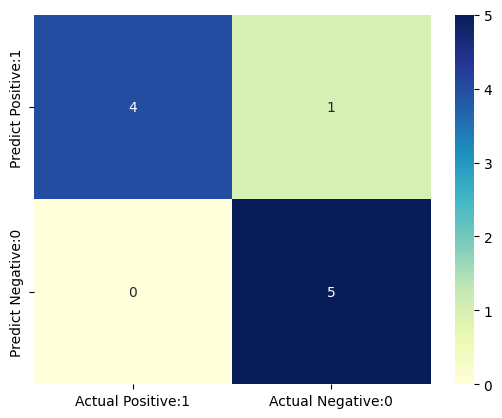

In [87]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#Classification metrices

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



#Classification accuracy

In [89]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [90]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9000


#Classification error

In [91]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1000


#Precision

In [92]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8000


#Recall

In [93]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


True Positive Rate

True Positive Rate is synonymous with Recall.

In [94]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


#False Positive Rate

In [95]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1667


#Specificity

In [96]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8333


#Calculate class probabilities

In [97]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999995e-01, 5.00376676e-09],
       [2.34069174e-09, 9.99999998e-01],
       [9.78055415e-01, 2.19445849e-02],
       [1.25490321e-09, 9.99999999e-01],
       [9.99999892e-01, 1.07971004e-07],
       [9.26986659e-02, 9.07301334e-01],
       [9.99996196e-01, 3.80426785e-06],
       [9.99978529e-01, 2.14705733e-05],
       [9.99999928e-01, 7.18102925e-08],
       [9.99999346e-01, 6.54188243e-07]])

Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [98]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000e+00,5.003767e-09
1,2.340692e-09,1.000000e+00
2,9.780554e-01,2.194458e-02
3,1.254903e-09,1.000000e+00
4,9.999999e-01,1.079710e-07
5,9.269867e-02,9.073013e-01
6,9.999962e-01,3.804268e-06
7,9.999785e-01,2.147057e-05
8,9.999999e-01,7.181029e-08
9,9.999993e-01,6.541882e-07


In [99]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([5.00376676e-09, 9.99999998e-01, 2.19445849e-02, 9.99999999e-01,
       1.07971004e-07, 9.07301334e-01, 3.80426785e-06, 2.14705733e-05,
       7.18102925e-08, 6.54188243e-07])

In [100]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

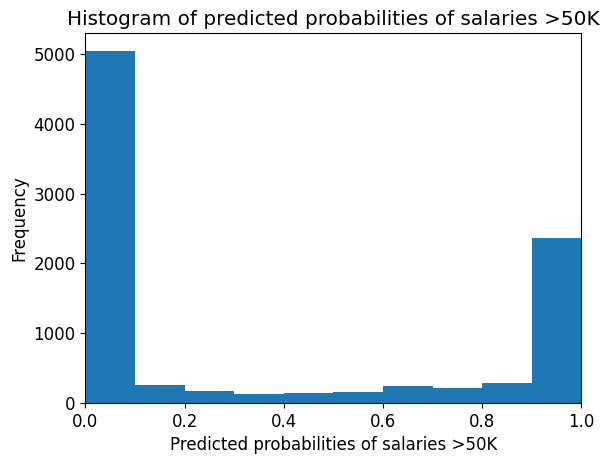

In [101]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

#ROC - AUC

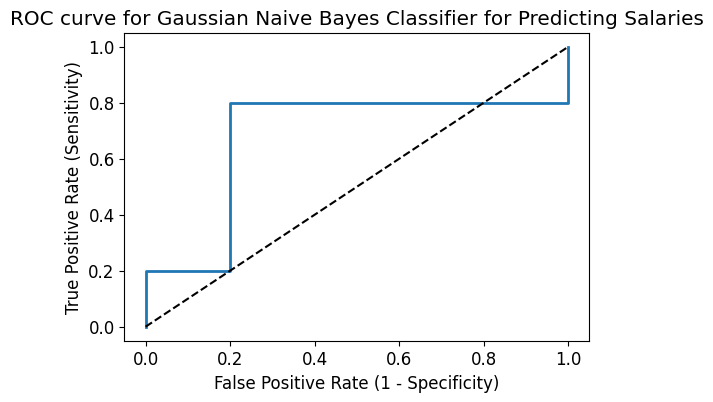

In [120]:
# plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_test_binary = list(map(lambda x: np.array(x) == '>50K', y_test))
# make y_pred1 the same length as y_test
y_pred1 = y_pred1[:len(y_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1, drop_intermediate=True)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [121]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6800


#Interpretation

In [122]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8918


#k-Fold Cross Validation

In [123]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80697563 0.79694219 0.79636711 0.80783939 0.79015296 0.77963671
 0.8126195  0.7958891  0.79971319 0.81166348]


In [124]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7998
